In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint
import scipy.constants as cste

# Scalar fields

$$T(x, y)=T_b+T_c \exp \left(-\frac{\left(x-x_c\right)^2+\left(y-y_c\right)^2}{\sigma^2}\right)+T_f \exp \left(-\frac{\left(x-x_f\right)^2+\left(y-y_f\right)^2}{\sigma^2}\right)$$

In [8]:
'''
def temp(X, Xc, Xf, sigma, Tb, Tc, Tf):
    x, y = X
    xc, yc = Xc
    xf, yf = Xf
    return Tb + Tc*np.exp(-((x-xc)**2 + (y-yc)**2)/(sigma**2)) \
            + Tf*np.exp(-((x-xf)**2 + (y-yf)**2)/(sigma**2))
'''

def temp(X, Xc, Xf, sigma, Tb, Tc, Tf):
    x, y = X
    xc, yc = Xc
    xf, yf = Xf
    return Tb + Tc*np.exp(-((x-xc)**2+(y-yc)**2)/sigma**2) \
        +Tf*np.exp(-((x-xf)**2+(y-yf)**2)/sigma**2)


'''
def temp(x,y,xc,yc,xf,yf, sigma, Tb, Tc, Tf):
    #x, y = X
    #xc, yc = Xc
    #xf, yf = Xf
    return Tb + Tc*np.exp(-((x-xc)**2+(y-yc)**2)/sigma**2) \
        +Tf*np.exp(-((x-xf)**2+(y-yf)**2)/sigma**2)
'''

Tb = 20
Tc = 100
Tf = -40

Xc = (-2, 2)
Xf = (2, -2)
sigma = 2

xmin, xmax, ymin, ymax = -5,5,-5,5


## Linspace

In [9]:
Nx, Ny = 5,3
x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)
Tp = np.zeros((Ny, Nx)) # Ny rows, Nx cols



for i in range(Nx): # cols
    for j in range(Ny): # rows
        Tp[j, i] = temp((x[i], y[j]), Xc, Xf, sigma, Tb, Tc, Tf)

print(x)
print(y)
print(Tp)

[-5.  -2.5  0.   2.5  5. ]
[-5.  0.  5.]
[[20.00003026 19.97376364 18.44920772 16.03946669 19.55564014]
 [23.87735037 54.46593237 28.12011699  6.40922711 18.44920772]
 [21.11089965 29.90133962 23.87735037 20.0665349  20.00003026]]


In [10]:
## Meshgrid

In [11]:
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

# X and Y are both 2*2 matrices. 
# Looking up the (j,i) element of both matrices will give us the our desired (x,y) coordinates
# all this to avoid an extra for loop, at the cost of memory usage

#T = temp((X,Y), Xc, Xc, sigma, Tb, Tc, Tf)
T = temp((X,Y), Xc, Xf, sigma, Tb, Tc, Tf)

print(T)


[[-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]]
[[-5. -5. -5. -5. -5.]
 [ 0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.]]
[[20.00003026 19.97376364 18.44920772 16.03946669 19.55564014]
 [23.87735037 54.46593237 28.12011699  6.40922711 18.44920772]
 [21.11089965 29.90133962 23.87735037 20.0665349  20.00003026]]


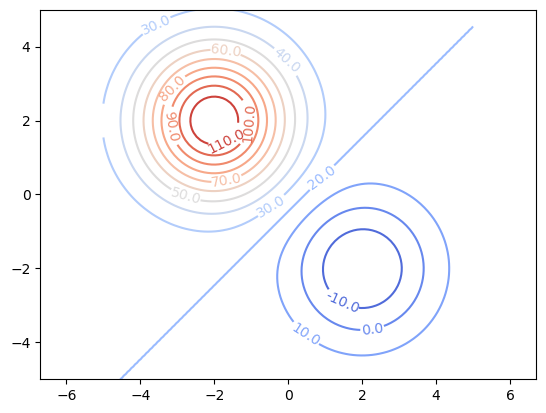

In [12]:
x_t = np.linspace(xmin, xmax, 100)
y_t = np.linspace(ymin, ymax, 100)
X_t, Y_t = np.meshgrid(x_t, y_t)

T_res = temp((X_t,Y_t), Xc, Xf, sigma, Tb, Tc, Tf)

CS = plt.contour(X_t,Y_t, T_res, 16, cmap="coolwarm")
plt.clabel(CS, fontsize=10, fmt='%1.1f')
plt.axis('equal')
plt.show()

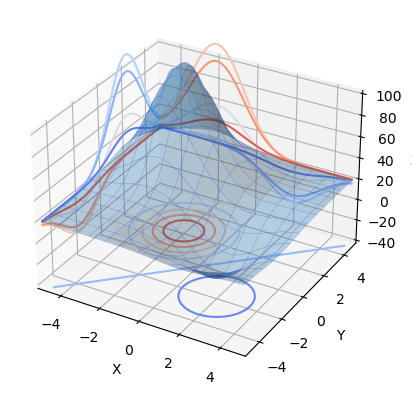

In [13]:
ax = plt.figure().add_subplot(projection='3d')
# Plot the 3D surface
ax.plot_surface(X_t, Y_t, T_res, edgecolor='royalblue', lw=0.1, rstride=8, cstride=8,
                alpha=0.3)
# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.

ax.contour(X_t, Y_t, T_res, zdir='z', offset=Tf, cmap='coolwarm')
ax.contour(X_t, Y_t, T_res, zdir='x', offset=xmin, cmap='coolwarm')
ax.contour(X_t, Y_t, T_res, zdir='y', offset=ymax, cmap='coolwarm')

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), zlim=(Tf, Tc),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

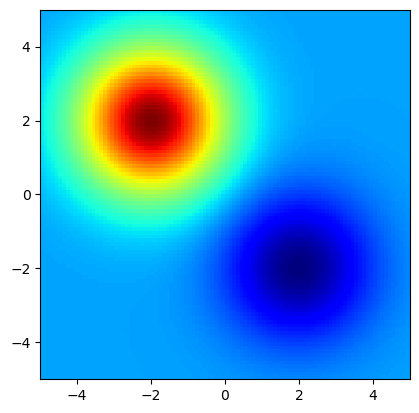

In [14]:
im = plt.imshow(T_res, origin='lower', extent=(xmin, xmax, ymin, ymax), cmap="jet")
#plt.axis('equal')
plt.show()

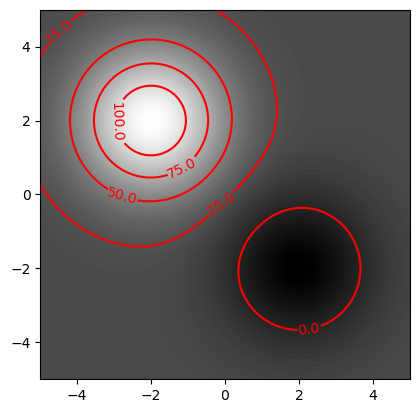

In [15]:
im = plt.imshow(T_res, interpolation="bilinear", origin="lower", cmap="gray", extent=(xmin, xmax, ymin, ymax))
CS = plt.contour(X_t, Y_t, T_res, 5, colors='r') # 5 is supposedly the vertical step between level curves
plt.clabel(CS, fontsize=10, fmt='%1.1f')
#plt.axis('equal')
plt.show()
                

## Numerical integration

$$\int_0^1 f(x) d x=\left[\frac{x^4}{4}+\frac{x^2}{2}\right]_0^1=\frac{1}{4}+\frac{1}{2}=\frac{3}{4}=0.75$$

In [16]:
def f(x):
    return x**3 + x

# we can integrate numerically between 0 and 1

res, err = quad(f, 0, 1)
print(res, err)

0.7499999999999999 8.326672684688672e-15


# Atomic Orbitals

\begin{array}{|c|c|c|}
\hline & \text { partie angulaire } & \text { partie radiale } \\
\hline \hline 1 s & \frac{1}{2 \sqrt{\pi}} & R_{10}(r)=\frac{2}{a_0^{3 / 2}} e^{-r / a_0} \\
\hline 2 s & \frac{1}{2 \sqrt{\pi}} & R_{20}(r)=\frac{1}{a_0^{3 / 2}} \frac{1}{\sqrt{2}}\left(1-\frac{r}{2 a_0}\right) e^{-r / 2 a_0} \\
\hline 3 s & \frac{1}{2 \sqrt{\pi}} & R_{30}(r)=\frac{1}{a_0^{3 / 2}} \frac{2}{\sqrt{3}}\left(1-\frac{2 r}{a_0}+\frac{4}{27}\left(\frac{r}{a_0}\right)^2\right) e^{-r / 3 a_0} \\
\hline 2 p_x & \frac{1}{2}\left(\frac{3}{\pi}\right)^{1 / 2} \frac{x}{r} & R_{21}(r)=\frac{1}{a_0^{3 / 2}} \frac{1}{2 \sqrt{6}} \frac{r}{a_0} e^{-r / 2 a_0} \\
\hline 2 p_z & \frac{1}{2}\left(\frac{3}{\pi}\right)^{1 / 2} \frac{z}{r} & R_{21}(r) \\
\hline 3 d_{x z} & \frac{1}{2}\left(\frac{15}{\pi}\right)^{1 / 2} \frac{x z}{r^2} & R_{32}(r)=\frac{1}{a_0^{3 / 2}} \frac{4}{81 \sqrt{30}}\left(\frac{r}{a_0}\right)^2 e^{-r / 3 a_0} \\
\hline 3 d_{z^2} & \frac{1}{4}\left(\frac{5}{\pi}\right)^{1 / 2} \frac{2 z^2-x^2-y^2}{r^2} & R_{32}(r) \\
\hline
\end{array}

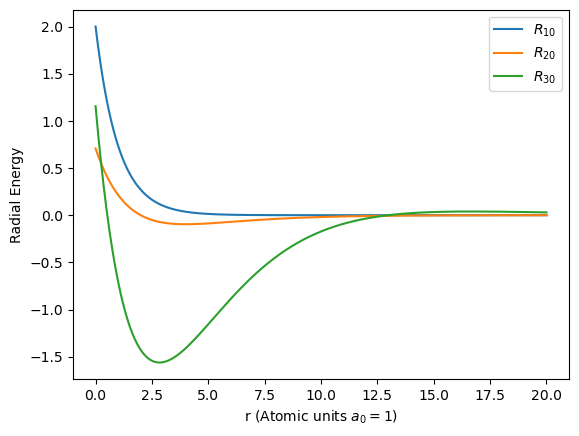

In [17]:
# working in atomic length units, a0 = 1 (bohr's radius)
r = np.linspace(0, 20, 1000)

R10 = 2*np.exp(-r)
R20 = (1/np.sqrt(2))*(1-r/2)*np.exp(-r/2)
R30 = (2/np.sqrt(3))*(1-2*r + (4/27)*(r**2))*np.exp(-r/3)

plt.plot(r, R10, label=r"$R_{10}$")
plt.plot(r, R20, label=r"$R_{20}$")
plt.plot(r, R30, label=r"$R_{30}$")
plt.legend()

plt.ylabel("Radial Energy")
plt.xlabel("r (Atomic units $a_0 = 1$)")
plt.show()

In [18]:
X_r, Z_r = np.meshgrid(np.linspace(-20, 20, 5000), np.linspace(-20, 20, 5000))
R = np.sqrt(X_r**2 + Z_r**2)

R10_im = 2*np.exp(-R)
R20_im = (1/np.sqrt(2))*(1-R/2)*np.exp(-R/2)
R30_im = (2/np.sqrt(3))*(1-2*R + (4/27)*(R**2))*np.exp(-R/3)

Text(0, 0.5, 'y')

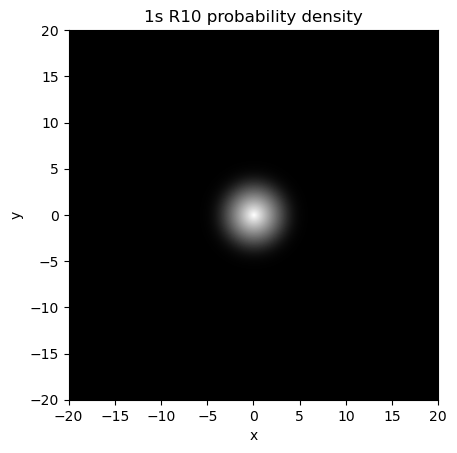

In [19]:
im = plt.imshow(np.log(R10_im**2 + 1e-3), origin="lower", cmap="gray", extent=(-20, 20, -20, 20))
# probability is proportional to energy squared (Born's rule)
# 1e-3 offset is to adjust the value at which it is black

plt.title("1s R10 probability density")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

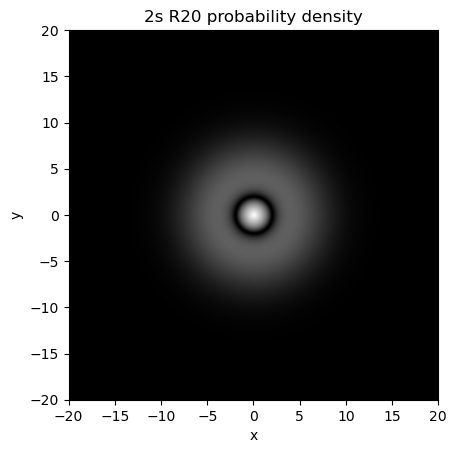

In [20]:
im = plt.imshow(np.log(R20_im**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-20, 20, -20, 20))
plt.title("2s R20 probability density")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'z')

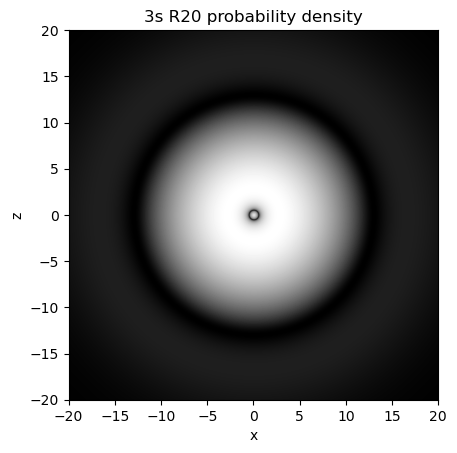

In [21]:
im = plt.imshow(np.log(R30_im**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-20, 20, -20, 20))
plt.title("3s R20 probability density")
plt.xlabel("x")
plt.ylabel("z")

In [22]:
# 2px

A_px = 1/2*np.sqrt(3/np.pi)*X_r/R
R_px = 1/(2*np.sqrt(6)) * R * np.exp(-R/2)

Text(0, 0.5, 'z')

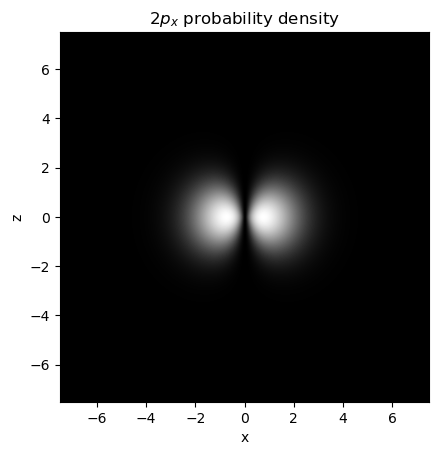

In [23]:
im = plt.imshow(np.log((A_px*R_px)**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-7.5, 7.5, -7.5, 7.5))
plt.title("$2p_x$ probability density")
plt.xlabel("x")
plt.ylabel("z")

Text(0, 0.5, 'z')

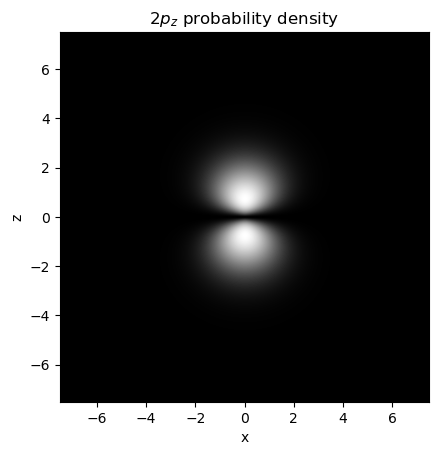

In [24]:
# 2pz

A_pz = 1/2*np.sqrt(3/np.pi)*Z_r/R
R_pz = 1/(2*np.sqrt(6)) * R * np.exp(-R/2)

im = plt.imshow(np.log((A_pz*R_pz)**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-7.5, 7.5, -7.5, 7.5))
plt.title("$2p_z$ probability density")
plt.xlabel("x")
plt.ylabel("z")

Text(0, 0.5, 'z')

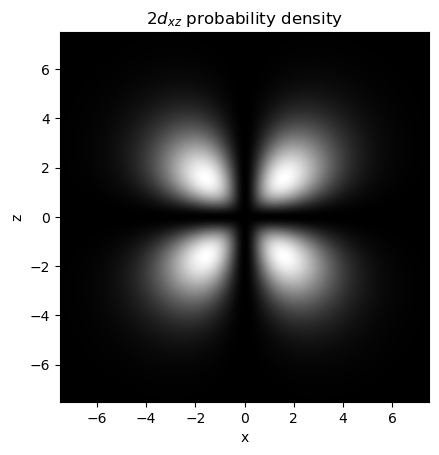

In [25]:
# 2dxz

y = 0
A_dxz = 1/2*np.sqrt(15/np.pi)*X_r*Z_r/R**2
R_dxz = 4/(81*np.sqrt(30)) * R**2 * np.exp(-R/3)

im = plt.imshow(np.log((A_dxz*R_dxz)**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-7.5, 7.5, -7.5, 7.5))
plt.title("$2d_{xz}$ probability density")
plt.xlabel("x")
plt.ylabel("z")

Text(0, 0.5, 'z')

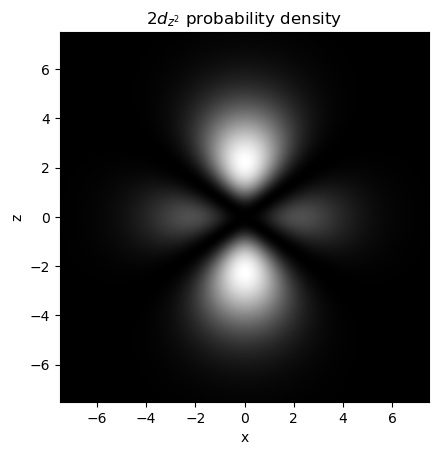

In [26]:
# 2dz2

y = 0
A_dz2 = 0.25*np.sqrt(5/np.pi)*(2*Z_r**2 - X_r**2 - y**2)/R**2
R_dz2 = R_dxz

im = plt.imshow(np.log((A_dz2*R_dz2)**2 + 1e-3), interpolation="bilinear", origin="lower", cmap="gray", extent=(-7.5, 7.5, -7.5, 7.5))
plt.title("$2d_{z^2}$ probability density")
plt.xlabel("x")
plt.ylabel("z")

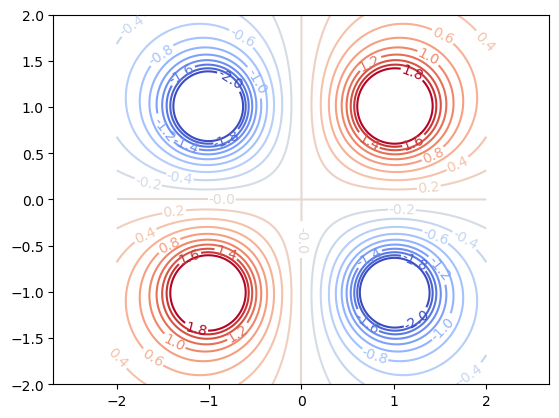

In [27]:
x_e = np.linspace(-2, 2, 1000)
y_e = np.linspace(-2, 2, 1000)

X_e, Y_e = np.meshgrid(x_e, y_e)

# (x, y, charge)
charge_pos_sign = np.array([(1, 1, 1), (1, -1, -1), (-1, -1, 1), (-1, 1, -1)])
Phi = np.zeros(shape = X_e.shape)
for i in range(len(charge_pos_sign)):
    charge_x = charge_pos_sign[i][0]
    charge_y = charge_pos_sign[i][1]
    charge = charge_pos_sign[i][2]
    Phi += charge/np.sqrt((X_e-charge_x)**2 + (Y_e-charge_y)**2)

# we can explicitely define the contour levels
contour_levels = np.arange(-2.0, 2.0, 0.2)
CS = plt.contour(X_e, Y_e, Phi, contour_levels, cmap="coolwarm")
plt.clabel(CS, fontsize=10, fmt='%1.1f')
plt.axis("equal")
plt.show()

## Uniformely charged ring

I suppose this is a ring in the Oxy plane, we also only consider the potential in this plane

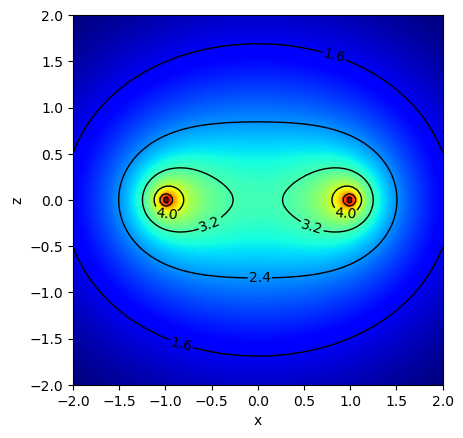

In [28]:
def d_phi(theta, x, z):
    #print(np.shape(x**2))
    #print(np.shape(z**2))
    #print(np.shape(x*np.cos(theta)))
    r = np.sqrt(x**2 + z**2 + 1 - 2*x*np.cos(theta))
    return 1/r

def phi(x, z):
    J, err = quad(d_phi, 0, cste.pi, (x, z))
    return J

phi_vect = np.vectorize(phi)

x_r = np.linspace(-2.0, 2.0, 100)
z_r = np.linspace(-2.0, 2.0, 100)


# we integrate about theta to find the contributions of each charge element
# on the ring to the potential field on the (x,z) plane. 
# This field lies in the plane and does not depend on theta

X_r, Z_r = np.meshgrid(x_r, z_r)


Phi_ring = phi_vect(X_r, Z_r)

# plotting potential on heatmap then plotting the corresponding contours

plt.rcParams["contour.linewidth"] = 1.0
 
im = plt.imshow(Phi_ring, interpolation="bilinear", origin="lower", cmap="jet", extent=(-2, 2, -2, 2))
CS = plt.contour(X_r, Z_r, Phi_ring, 6, colors='k') # 5 is supposedly the vertical step between level curves
plt.clabel(CS, fontsize=10, fmt='%1.1f')
plt.xlabel("x")
plt.ylabel("z")
#plt.axis('equal')
plt.show()

## Vector Fields

### B.2 Velocity field

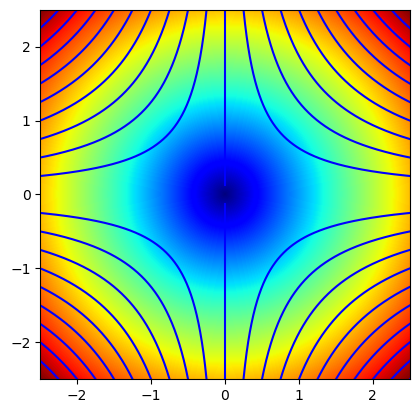

In [29]:
def velocity(X, t):
    x, y = X
    # returns [dx/dt, dy/dt]
    return [x, -y]

t = np.linspace(0, 3, 1000)

xmin, xmax, ymin, ymax = -2.5, 2.5, -2.5, 2.5
for x_ini in np.linspace(xmin, xmax, 21):
    X0_1 = [x_ini, ymin]
    X_1 = odeint(velocity, X0_1, t)
    #print(X_1.T)

    x1, y1 = X_1.T
    plt.plot(x1,y1, color="blue")

    X0_2 = [x_ini, ymax]
    X_2 = odeint(velocity, X0_2, t)
    #print(X_2.T)

    x2, y2 = X_2.T
    plt.plot(x2,y2, color="blue")

plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))


x = np.linspace(xmin, xmax, 1000)
y = np.linspace(ymin, ymax, 1000)

X, Y = np.meshgrid(x, y)
norm = np.sqrt(X**2 + Y**2)

im = plt.imshow(norm, origin='lower',cmap=plt.cm.jet, extent=(-2.5,2.5,-2.5,2.5))
#plt.axis('equal')
plt.show()
#plt.plot(x, y)

#plt.show()

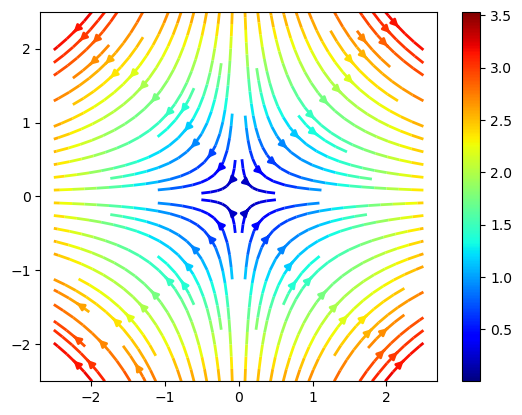

In [30]:
Vx = X
Vy = -Y
Vnorm = np.sqrt(X**2 + Y**2)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, Vx, Vy, color=Vnorm, linewidth=2, cmap=plt.cm.jet)
fig0.colorbar(strm.lines)
plt.axis('equal')
plt.show()

## Fields in Electromagnetism

### Electrostatics

By manual integration

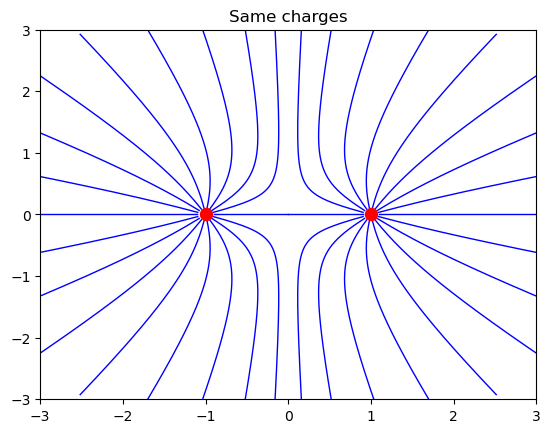

In [31]:
def e_field_lines(X, t, X_A, X_B, q_a, q_b):
    x, y = X
    xa, ya = X_A
    xb, yb = X_B

    # prevents divergence if ra, rb too small
    r0 = 0.1

    ra = np.sqrt((x-xa)**2 + (y-ya)**2)
    rb = np.sqrt((x-xb)**2 + (y-yb)**2)

    dx = q_a*(x-xa)/(ra+r0)**3 + q_b*(x-xb)/(rb+r0)**3
    dy = q_a*(y-ya)/(ra+r0)**3 + q_b*(y-yb)/(rb+r0)**3

    return [dx, dy]

u = np.linspace(0, 10, 1000) # curvilinear abssisa (since our equations are autonomous, no time dependence)


x_A, y_A = 1., 0.
x_B, y_B = -1., 0.

x_bounds = (-3, 3)
y_bounds = (-3, 3)

n_lines = 18 # fields lines per charge
r0 = 0.1

CI_A = np.zeros((n_lines, 2))
CI_B = np.zeros((n_lines, 2))


theta_step = 2*np.pi / n_lines
for i in range(0, n_lines):
    CI_A[i][0] = r0*np.cos(theta_step*i) + x_A
    CI_A[i][1] = r0*np.sin(theta_step*i) + y_A

for i in range(0, n_lines):
    CI_B[i][0] = r0*np.cos(theta_step*i) + x_B
    CI_B[i][1] = r0*np.sin(theta_step*i) + y_B

plt.scatter(x_A, y_A, c="r", zorder=5, s=75)
for X_ini in CI_A:
    X = odeint(e_field_lines, X_ini, u, args=((x_A, y_A), (x_B, y_B), 1, 1))

    x, y = X.T
    plt.plot(x,y, color="blue", linewidth=1)

plt.scatter(x_B, y_B, c="r", zorder=5, s=75)
for X_ini in CI_B:
    X = odeint(e_field_lines, X_ini, u, args=((x_A, y_A), (x_B, y_B), 1, 1))

    x, y = X.T
    plt.plot(x,y, color="blue", linewidth=1)

plt.xlim(x_bounds)
plt.ylim(y_bounds)

plt.title("Same charges")
plt.show()








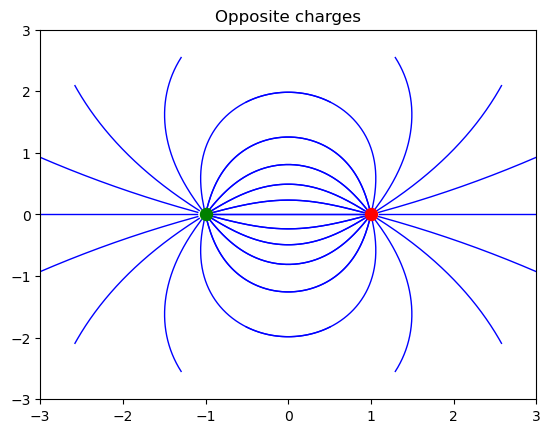

In [32]:
plt.scatter(x_A, y_A, c="r", zorder=5, s=75)
for X_ini in CI_A:
    X = odeint(e_field_lines, X_ini, u, args=((x_A, y_A), (x_B, y_B), 1, -1))

    x, y = X.T
    plt.plot(x,y, color="blue", linewidth=1)

plt.scatter(x_B, y_B, c="green", zorder=5, s=75)
for X_ini in CI_B:
    # need to invert abssisa because field goes inwards for negative charge
    # we want to travel the streamline in the opposite direction
    X = odeint(e_field_lines, X_ini, -u, args=((x_A, y_A), (x_B, y_B), 1, -1))

    x, y = X.T
    plt.plot(x,y, color="blue", linewidth=1)
    

plt.xlim(x_bounds)
plt.ylim(y_bounds)

plt.title("Opposite charges")
plt.show()


Using streamlines

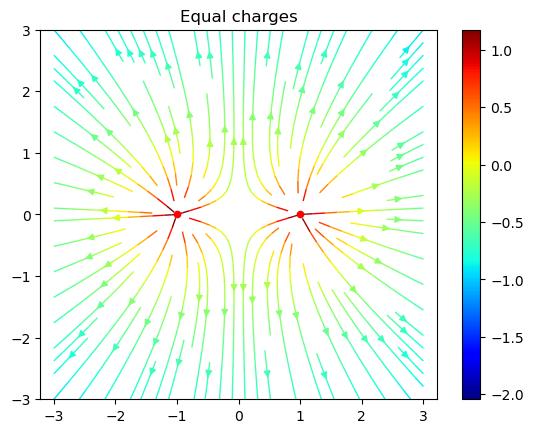

In [33]:
e_field_vect = np.vectorize(e_field_lines)

x = np.linspace(x_bounds[0], x_bounds[1], 1000)
y = np.linspace(y_bounds[0], y_bounds[1], 1000)

X, Y = np.meshgrid(x,y)


q_A, q_B = 1, 1





R_A = np.sqrt((X-x_A)**2 + (Y-y_A)**2)
R_B = np.sqrt((X-x_B)**2 + (Y-y_B)**2)
E_y = q_A*(Y-y_A)/(R_A+r0)**3 + q_B*(Y-y_B)/(R_B+r0)**3
E_x= q_A*(X-x_A)/(R_A+r0)**3 + q_B*(X-x_B)/(R_B+r0)**3
#Ex, Ey = e_field_vect([X, Y], t, (x_A, y_A), (x_B, y_B), 1, 1)

E_norm = np.sqrt(E_x**2 + E_y**2)#q_A/(R_A)**2 + q_B/(R_B)**2

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, E_x, E_y, color=np.log10(E_norm), linewidth=1, cmap=plt.cm.jet)
fig0.colorbar(strm.lines)
plt.axis('equal')

plt.title("Equal charges")

plt.scatter(x_A, y_A, c="r", zorder=5, s=20)
plt.scatter(x_B, y_B, c="r", zorder=5, s=20)
plt.show()


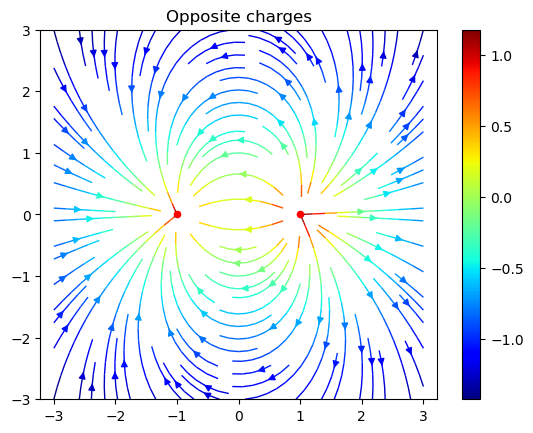

In [34]:
q_A, q_B = 1, -1


R_A = np.sqrt((X-x_A)**2 + (Y-y_A)**2)
R_B = np.sqrt((X-x_B)**2 + (Y-y_B)**2)
E_y = q_A*(Y-y_A)/(R_A+r0)**3 + q_B*(Y-y_B)/(R_B+r0)**3
E_x= q_A*(X-x_A)/(R_A+r0)**3 + q_B*(X-x_B)/(R_B+r0)**3
#Ex, Ey = e_field_vect([X, Y], t, (x_A, y_A), (x_B, y_B), 1, 1)

E_norm = np.sqrt(E_x**2 + E_y**2)#q_A/(R_A)**2 + q_B/(R_B)**2

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, E_x, E_y, color=np.log10(E_norm), linewidth=1, cmap=plt.cm.jet)
fig0.colorbar(strm.lines)
plt.axis('equal')

plt.title("Opposite charges")

plt.scatter(x_A, y_A, c="r", zorder=5, s=20)
plt.scatter(x_B, y_B, c="r", zorder=5, s=20)
plt.show()

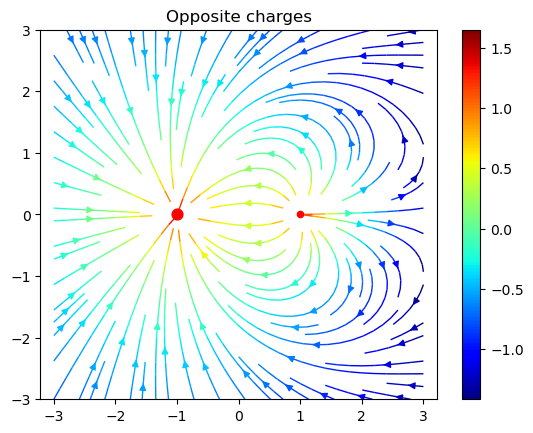

In [35]:
q_A, q_B = 1, -3


R_A = np.sqrt((X-x_A)**2 + (Y-y_A)**2)
R_B = np.sqrt((X-x_B)**2 + (Y-y_B)**2)
E_y = q_A*(Y-y_A)/(R_A+r0)**3 + q_B*(Y-y_B)/(R_B+r0)**3
E_x= q_A*(X-x_A)/(R_A+r0)**3 + q_B*(X-x_B)/(R_B+r0)**3
#Ex, Ey = e_field_vect([X, Y], t, (x_A, y_A), (x_B, y_B), 1, 1)

E_norm = np.sqrt(E_x**2 + E_y**2)#q_A/(R_A)**2 + q_B/(R_B)**2

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, E_x, E_y, color=np.log10(E_norm), linewidth=1, cmap=plt.cm.jet)
fig0.colorbar(strm.lines)
plt.axis('equal')

plt.title("Opposite charges")

plt.scatter(x_A, y_A, c="r", zorder=5, s=20)
plt.scatter(x_B, y_B, c="r", zorder=5, s=60)
plt.show()

## Magnetostatics

[]


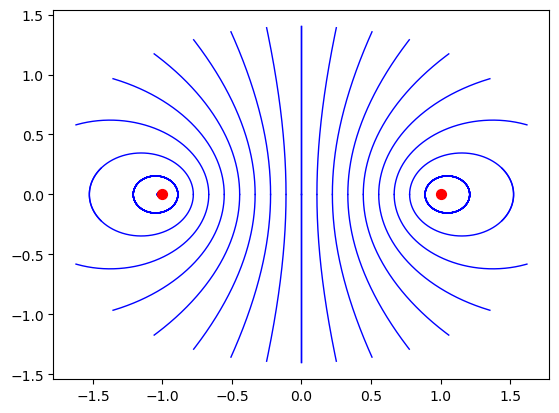

In [36]:
def dBx(theta, x, z, a):
        return z*np.cos(theta)/(x**2 + z**2 + a**2 - 2*a*x*np.cos(theta) + 0.01)**(3/2) 
    
def dBz(theta, x, z, a):
    return (a - x*np.cos(theta))/(x**2 + z**2 + a**2 - 2*a*x*np.cos(theta) + 0.01)**(3/2)
    

def mag_field_lines(X, t, a, e):
    x, z = X

    Bx, err = quad(dBx, 0, np.pi, (x, z, a))
    Bz, err = quad(dBz, 0, np.pi, (x, z, a))

    return [Bx, Bz]

a = 1
u_mag = np.linspace(0, 1, 1000)
CI = np.array([[x, 0] for x in np.linspace(0, 1, 10)])
#print(len(CI))
sols = []
plt.scatter(a, 0, c="r", zorder=5, s=50)
plt.scatter(-a, 0, c="r", zorder=5, s=50)
print(sols)
c = 0
for X_ini in CI:
    X = odeint(mag_field_lines, X_ini, u_mag, args=(a, 0))
    x, y = X.T
    sub = (x, y)
    sols.append(sub)

    #print(len(x), len(y))
    #sols[c][0] = x
    #sols[c][1] = y
    plt.plot(x,y, color="blue", linewidth=1)

    plt.plot(x, -y, color="blue", linewidth=1)
    
    plt.plot(-x, y, color="blue", linewidth=1)

    plt.plot(-x, -y, color="blue", linewidth=1)

    c += 1
plt.show()
    

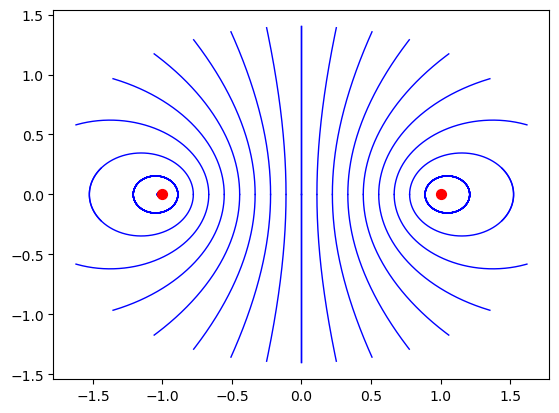

In [37]:
plt.scatter(a, 0, c="r", zorder=5, s=50)
plt.scatter(-a, 0, c="r", zorder=5, s=50)
for sol in sols:

    x, y = sol
    plt.plot(x,y, color="blue", linewidth=1)

    plt.plot(x, -y, color="blue", linewidth=1)
    
    plt.plot(-x, y, color="blue", linewidth=1)

    plt.plot(-x, -y, color="blue", linewidth=1)